In [1]:
import sys
sys.path.append('..')
from tqdm import tqdm
from src.visualization import draw_mlp_clustering_report, run_double_spectral_cluster
from src.experiment_tagging import get_model_path

Using TensorFlow backend.


In [2]:
model_tags = ('MNIST+L1REG', 'FASHION+L1REG', 'CIFAR10+L1REG',
              'CNN-MNIST+L1REG', 'CNN-FASHION+L1REG', 'CNN-CIFAR10+L1REG')
model_paths = {model_tag: get_model_path(model_tag) for model_tag in model_tags}
shuffle_methods = ['layer', 'layer_nonzero']

n_clust = 12
n_samples = 50
n_workers = 10

  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [32:01<2:40:06, 1921.38s/it]

 33%|███▎      | 2/6 [1:13:25<2:19:21, 2090.27s/it]

 50%|█████     | 3/6 [1:55:16<1:50:49, 2216.41s/it]

 67%|██████▋   | 4/6 [1:55:24<51:48, 1554.03s/it]  

 83%|████████▎ | 5/6 [1:55:34<18:10, 1090.82s/it]

100%|██████████| 6/6 [1:55:43<00:00, 766.13s/it] 

100%|██████████| 6/6 [1:55:43<00:00, 1157.24s/it]

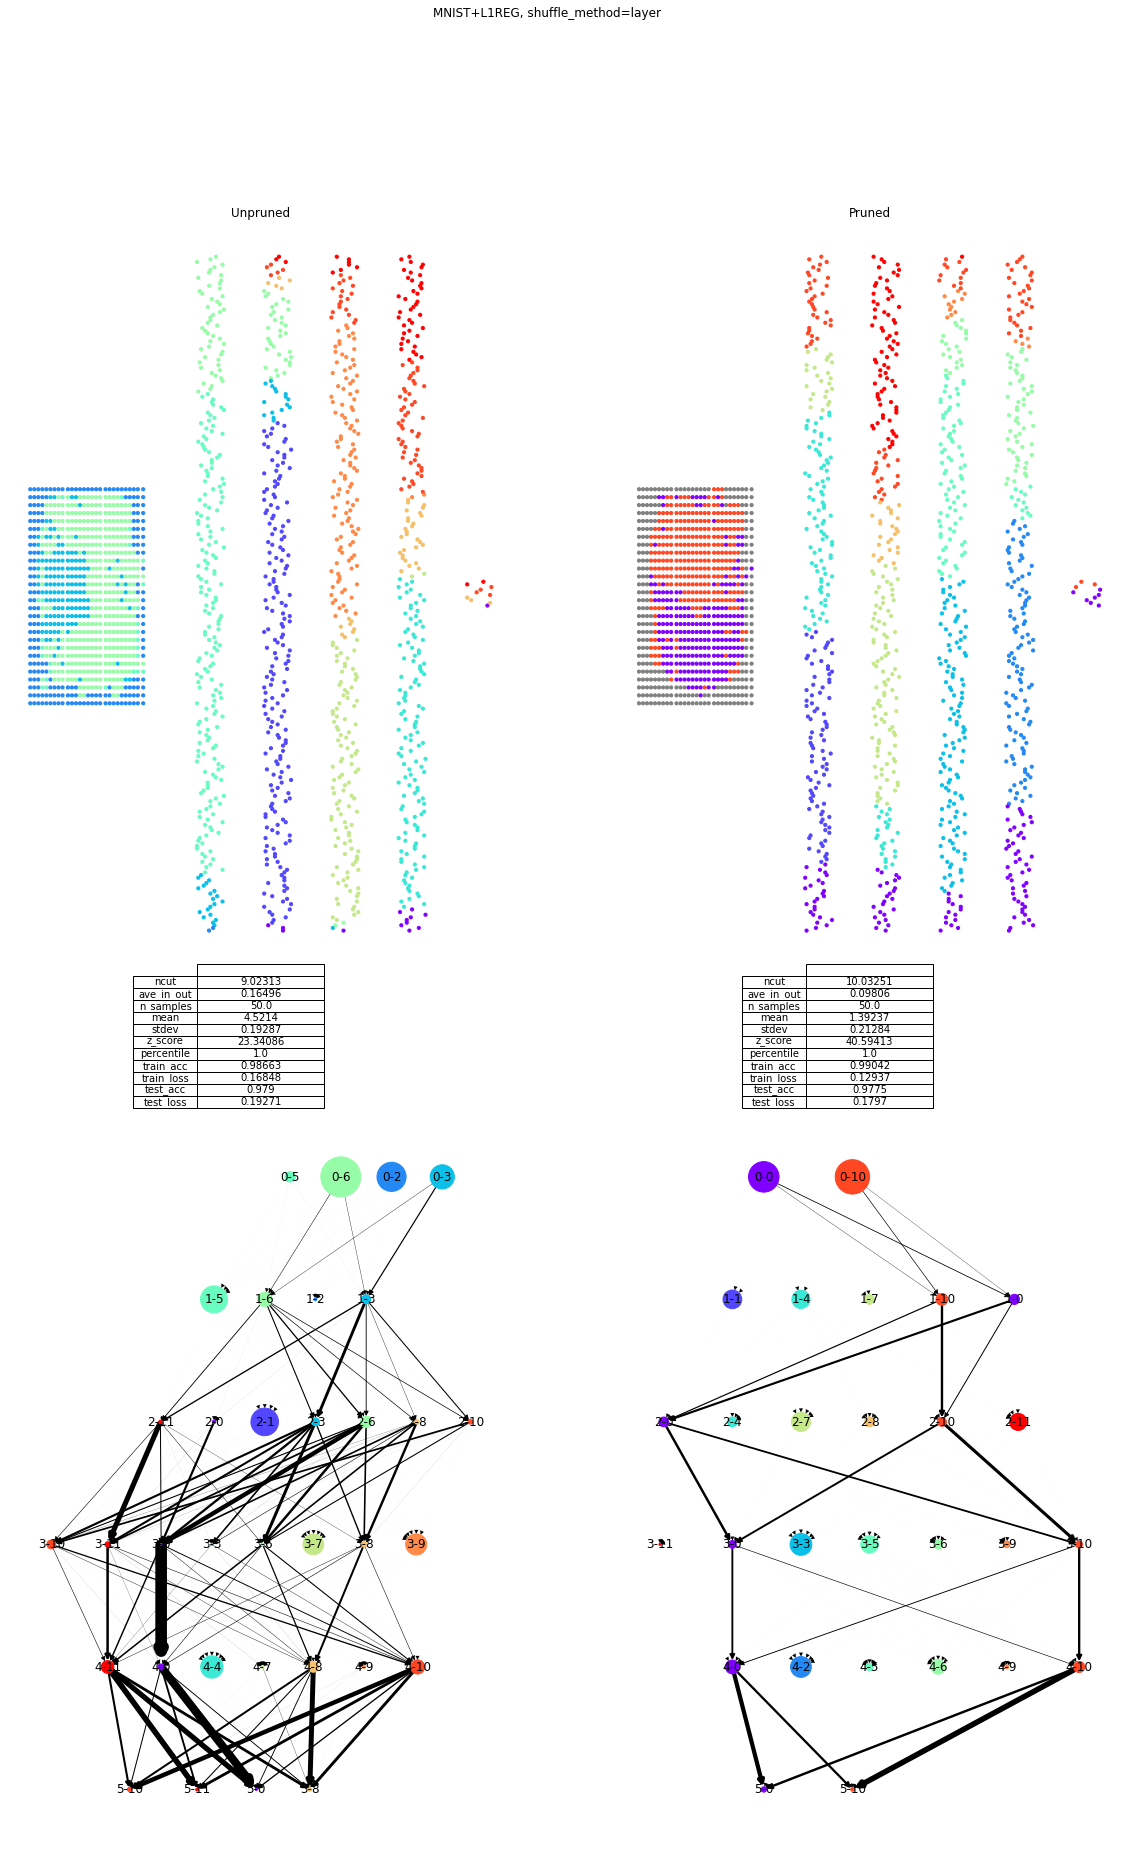

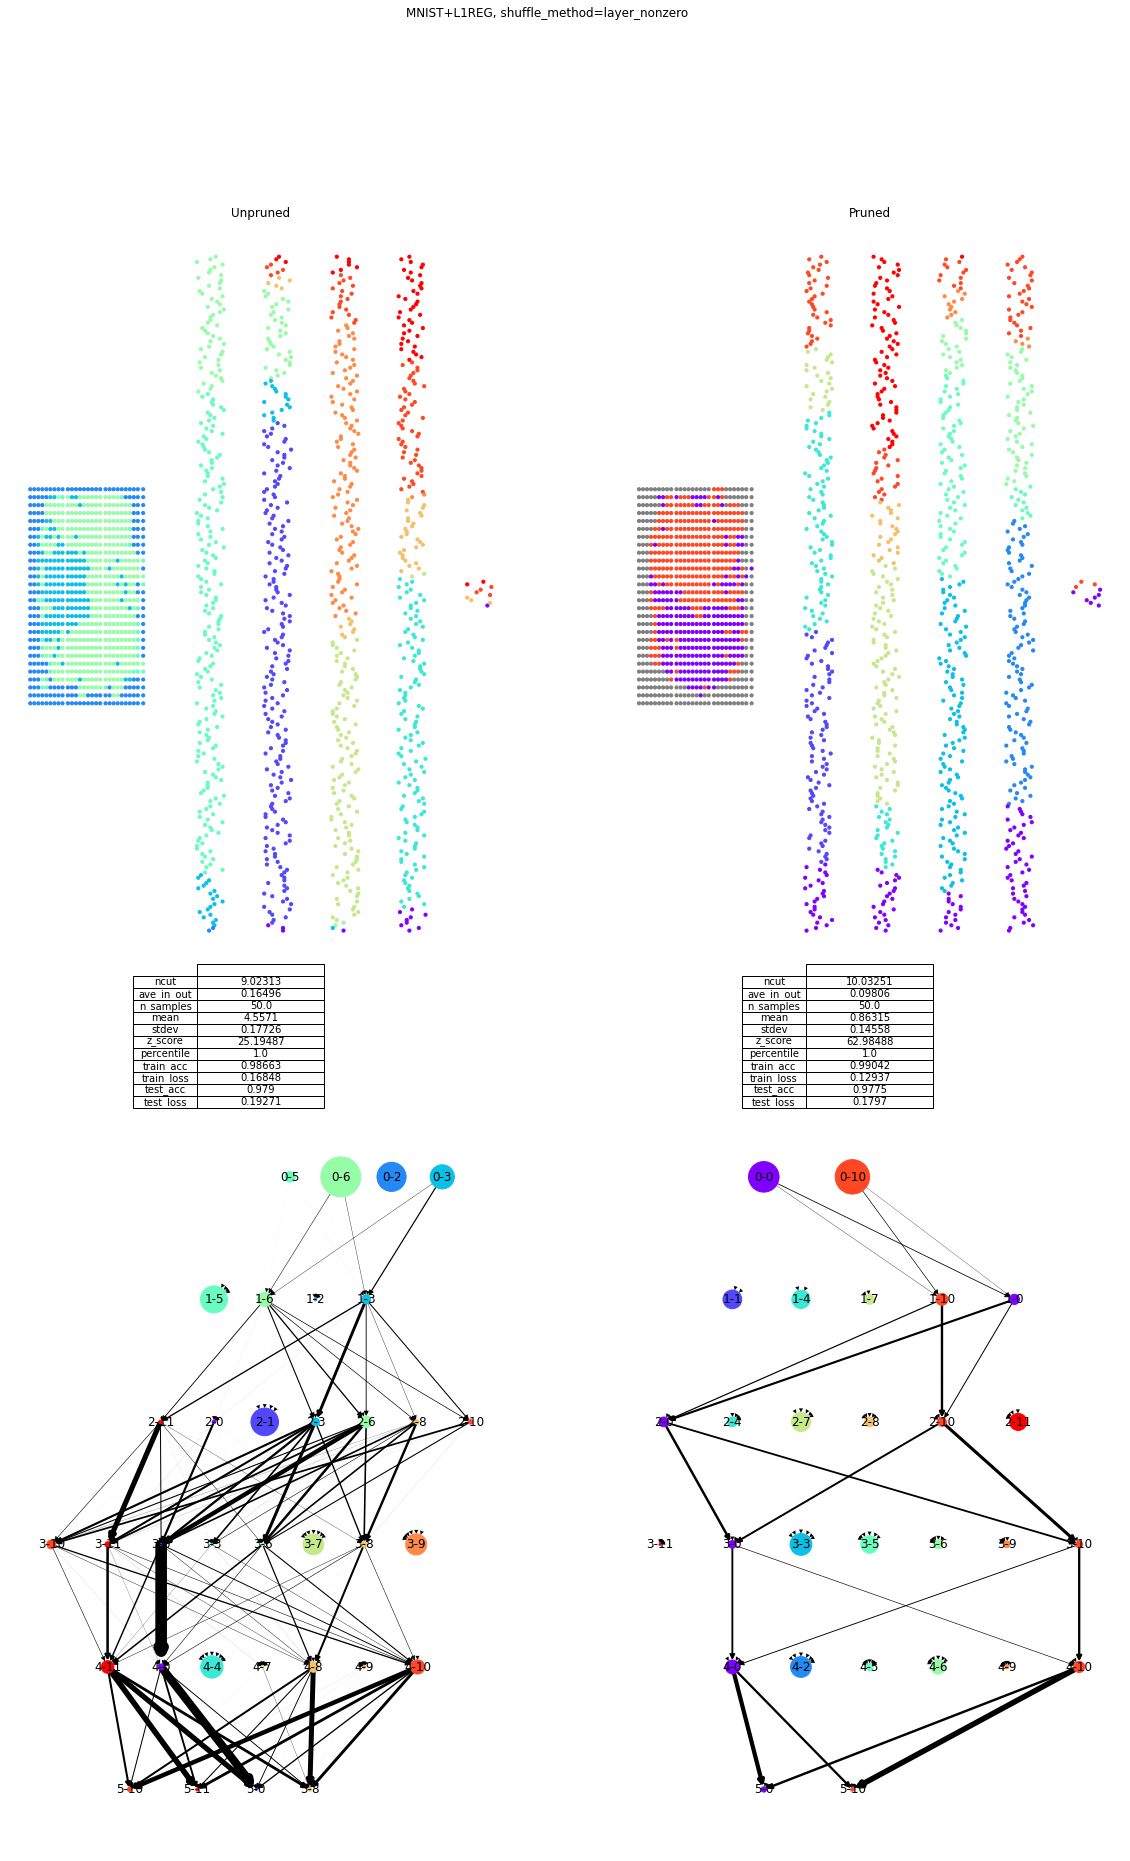

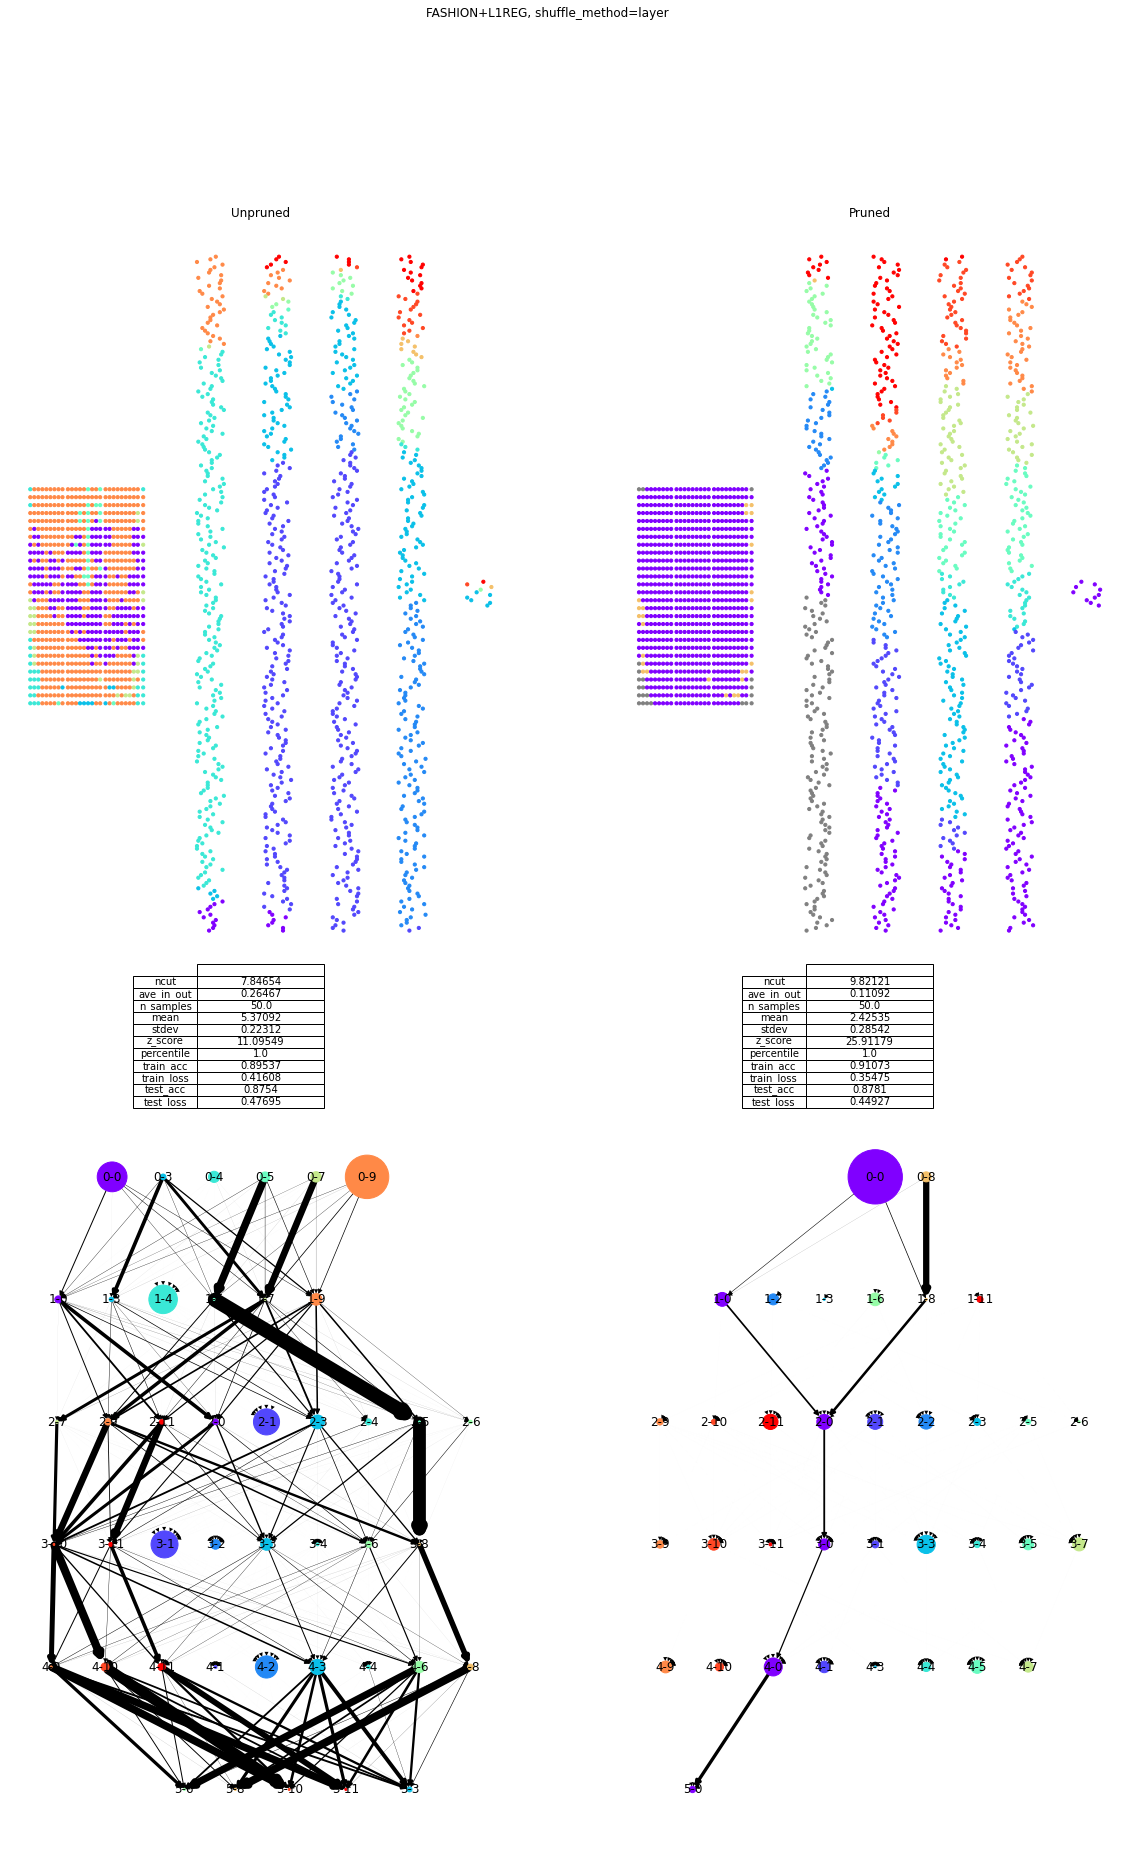

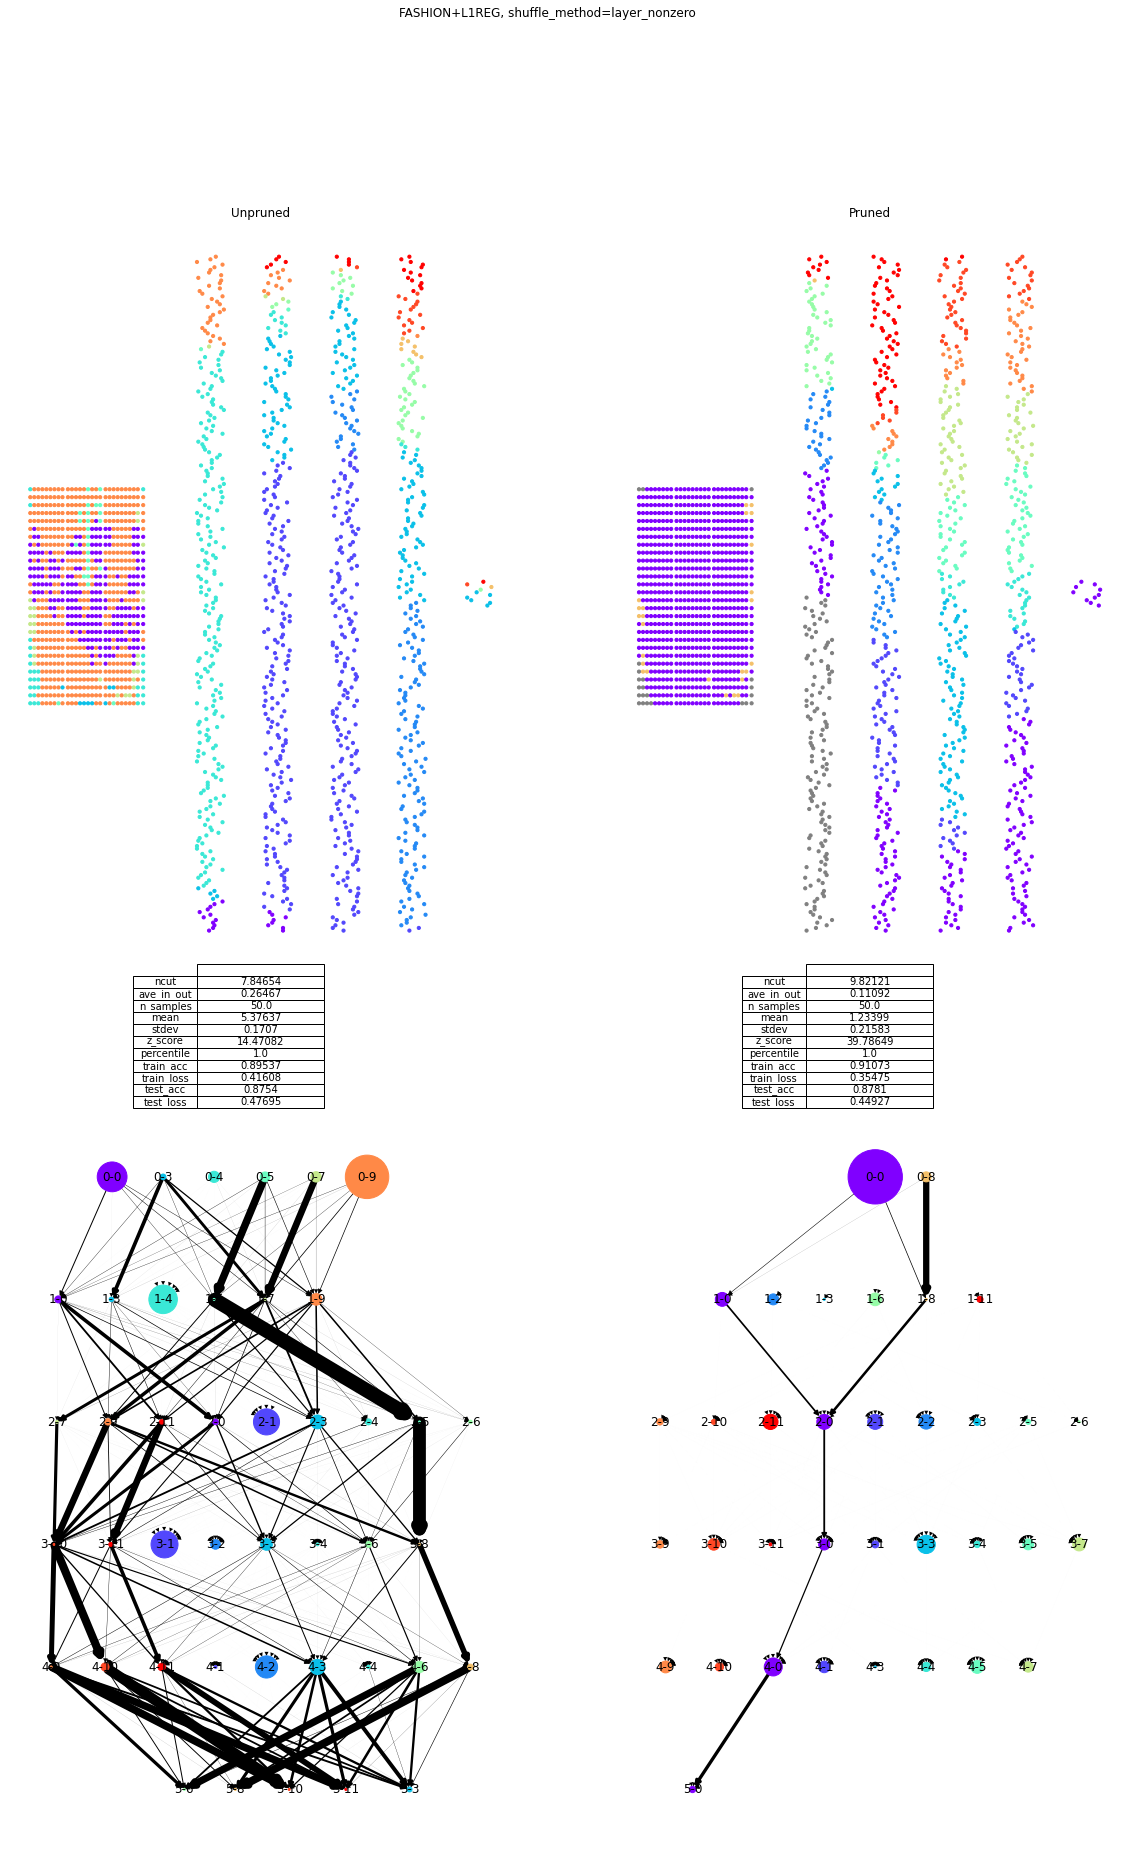

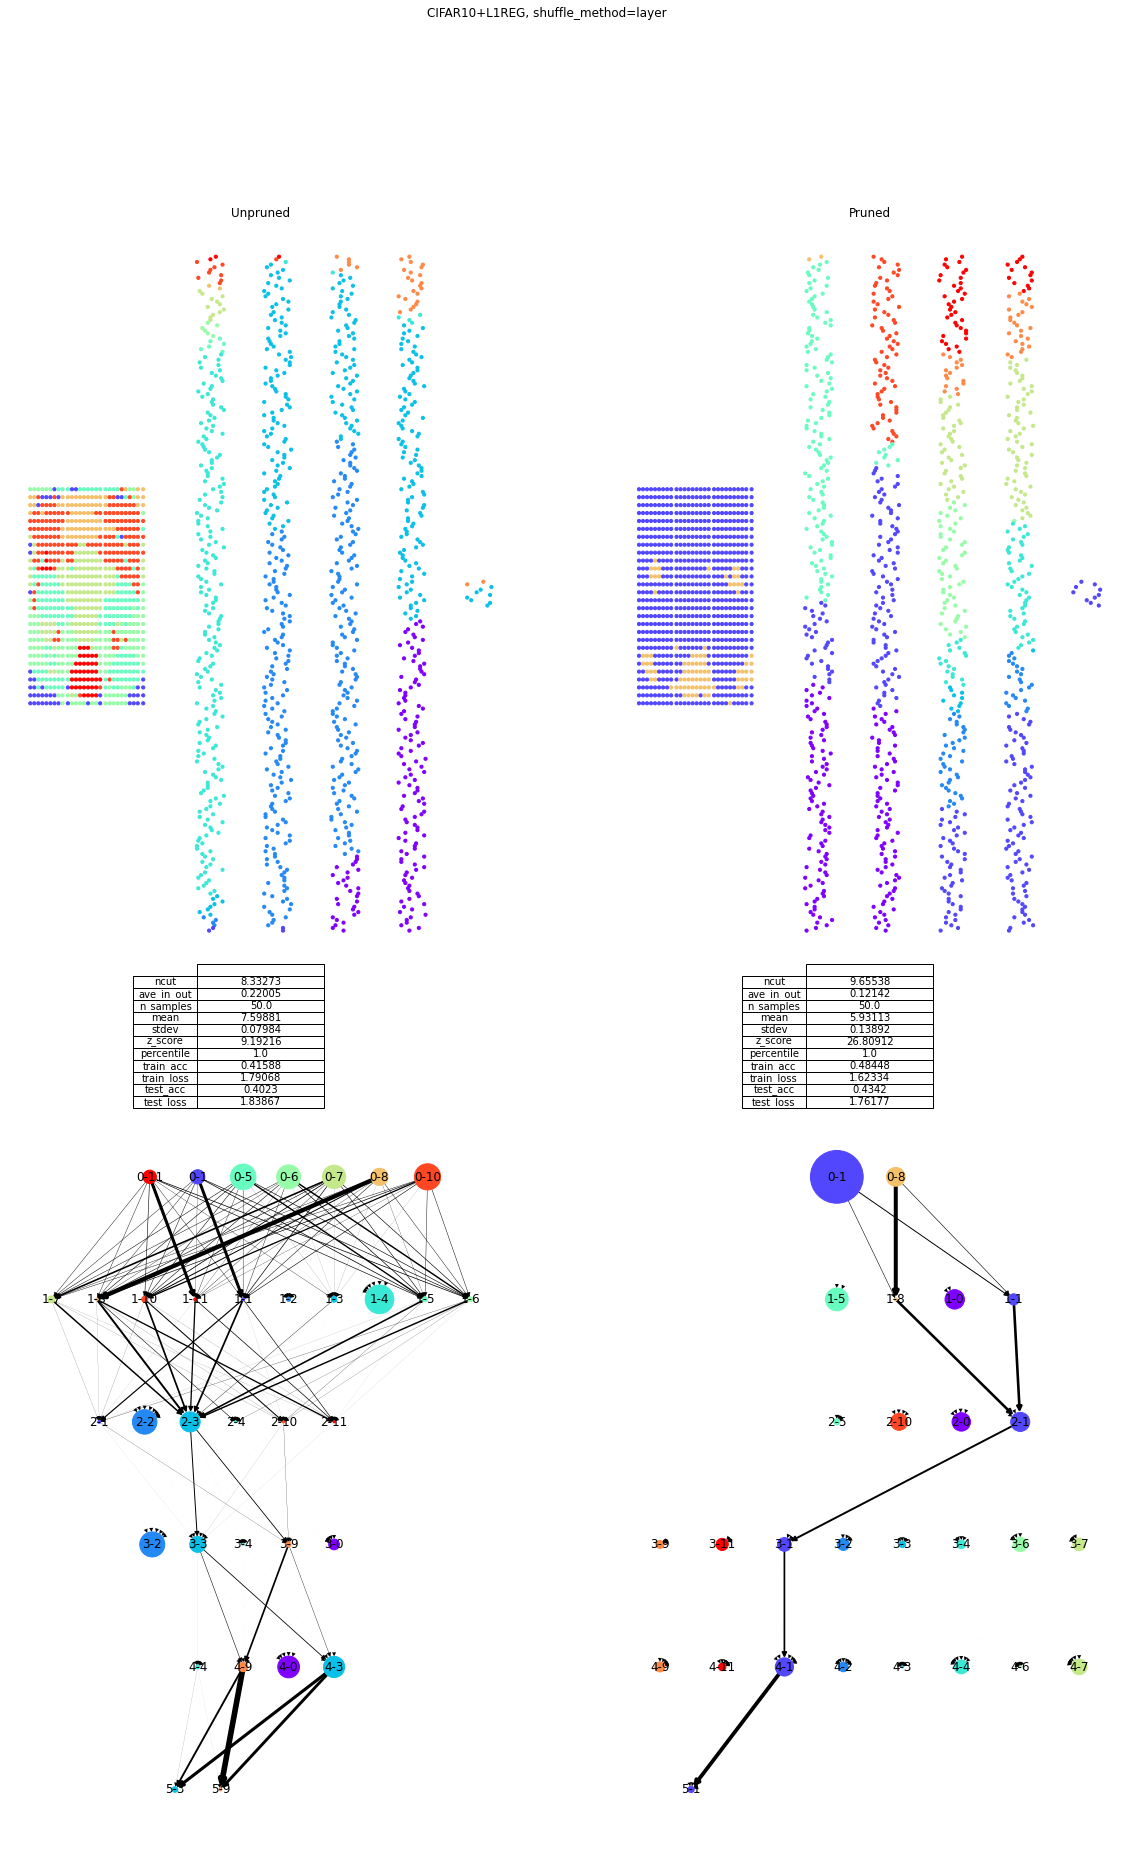

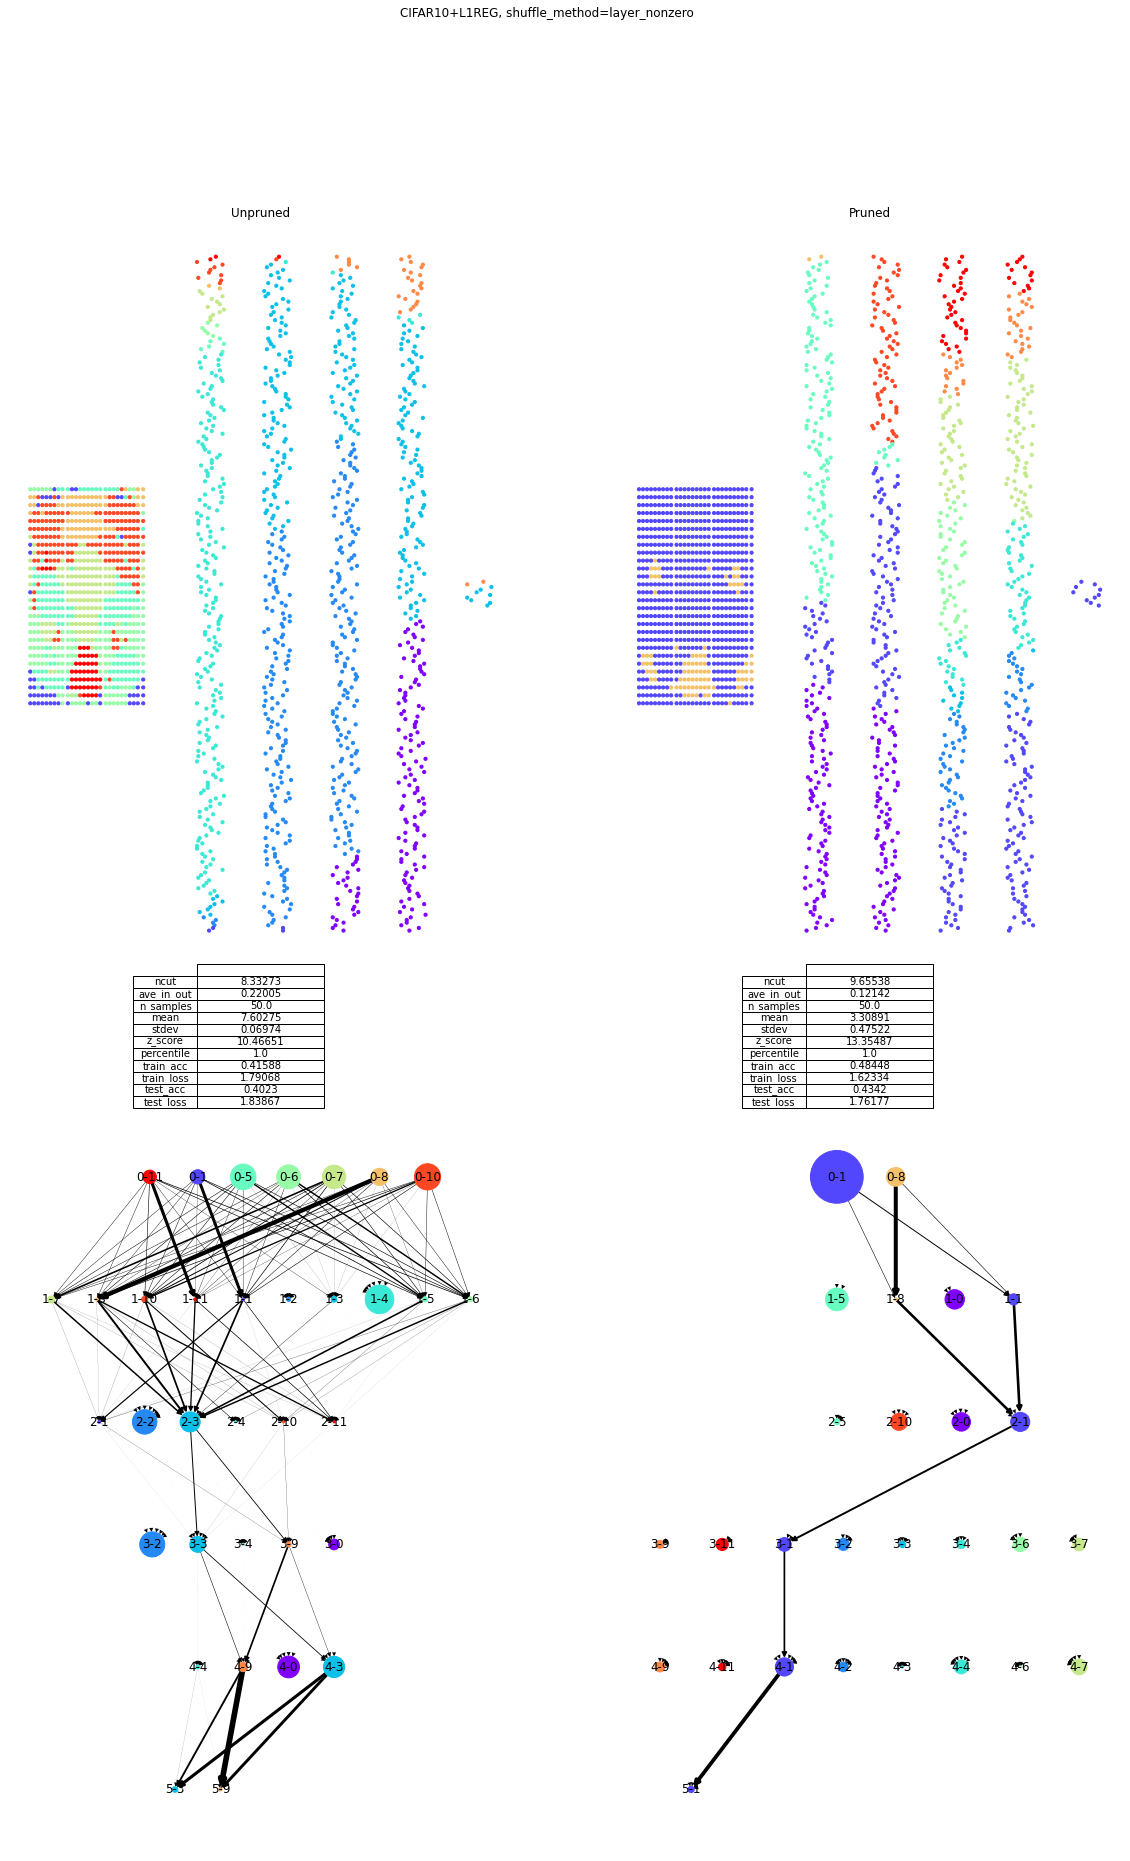

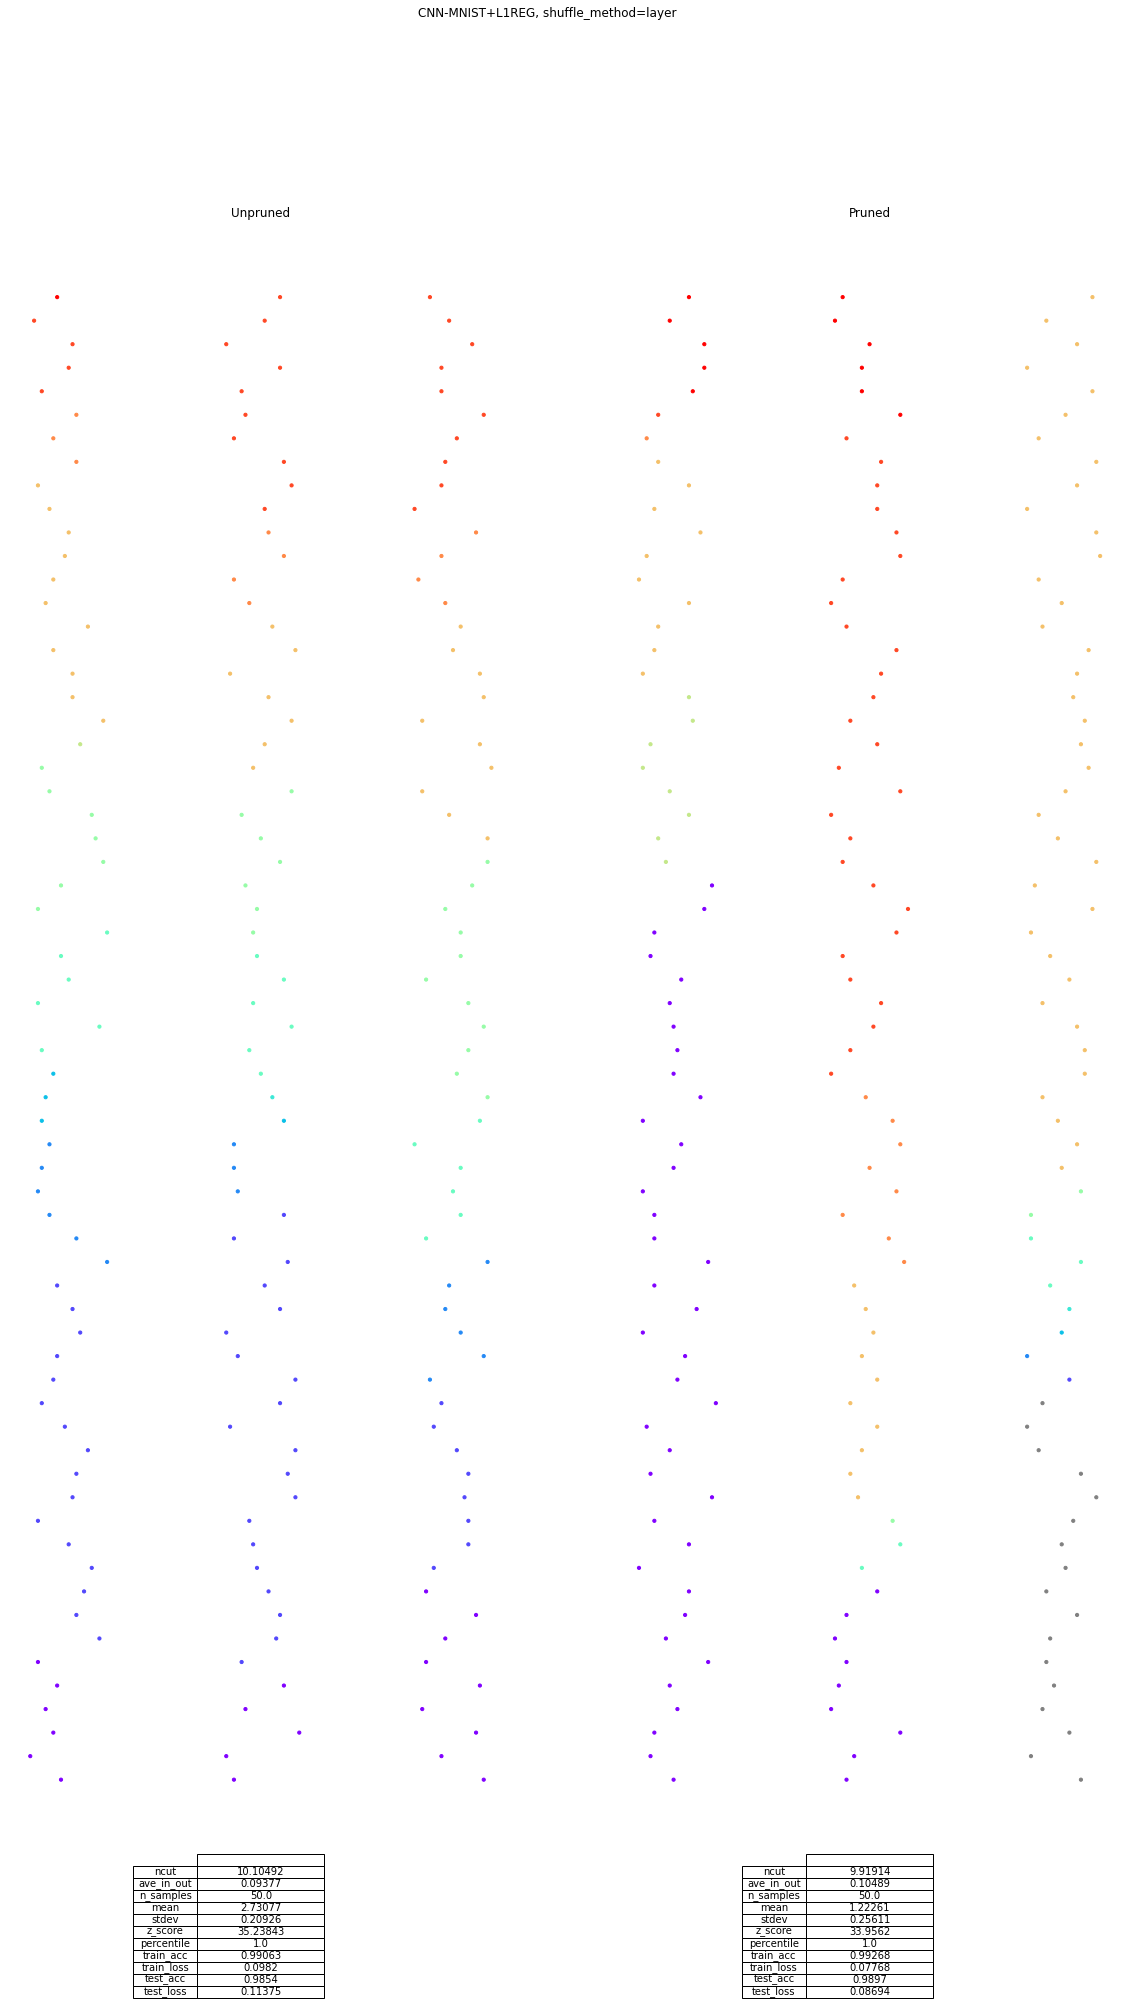

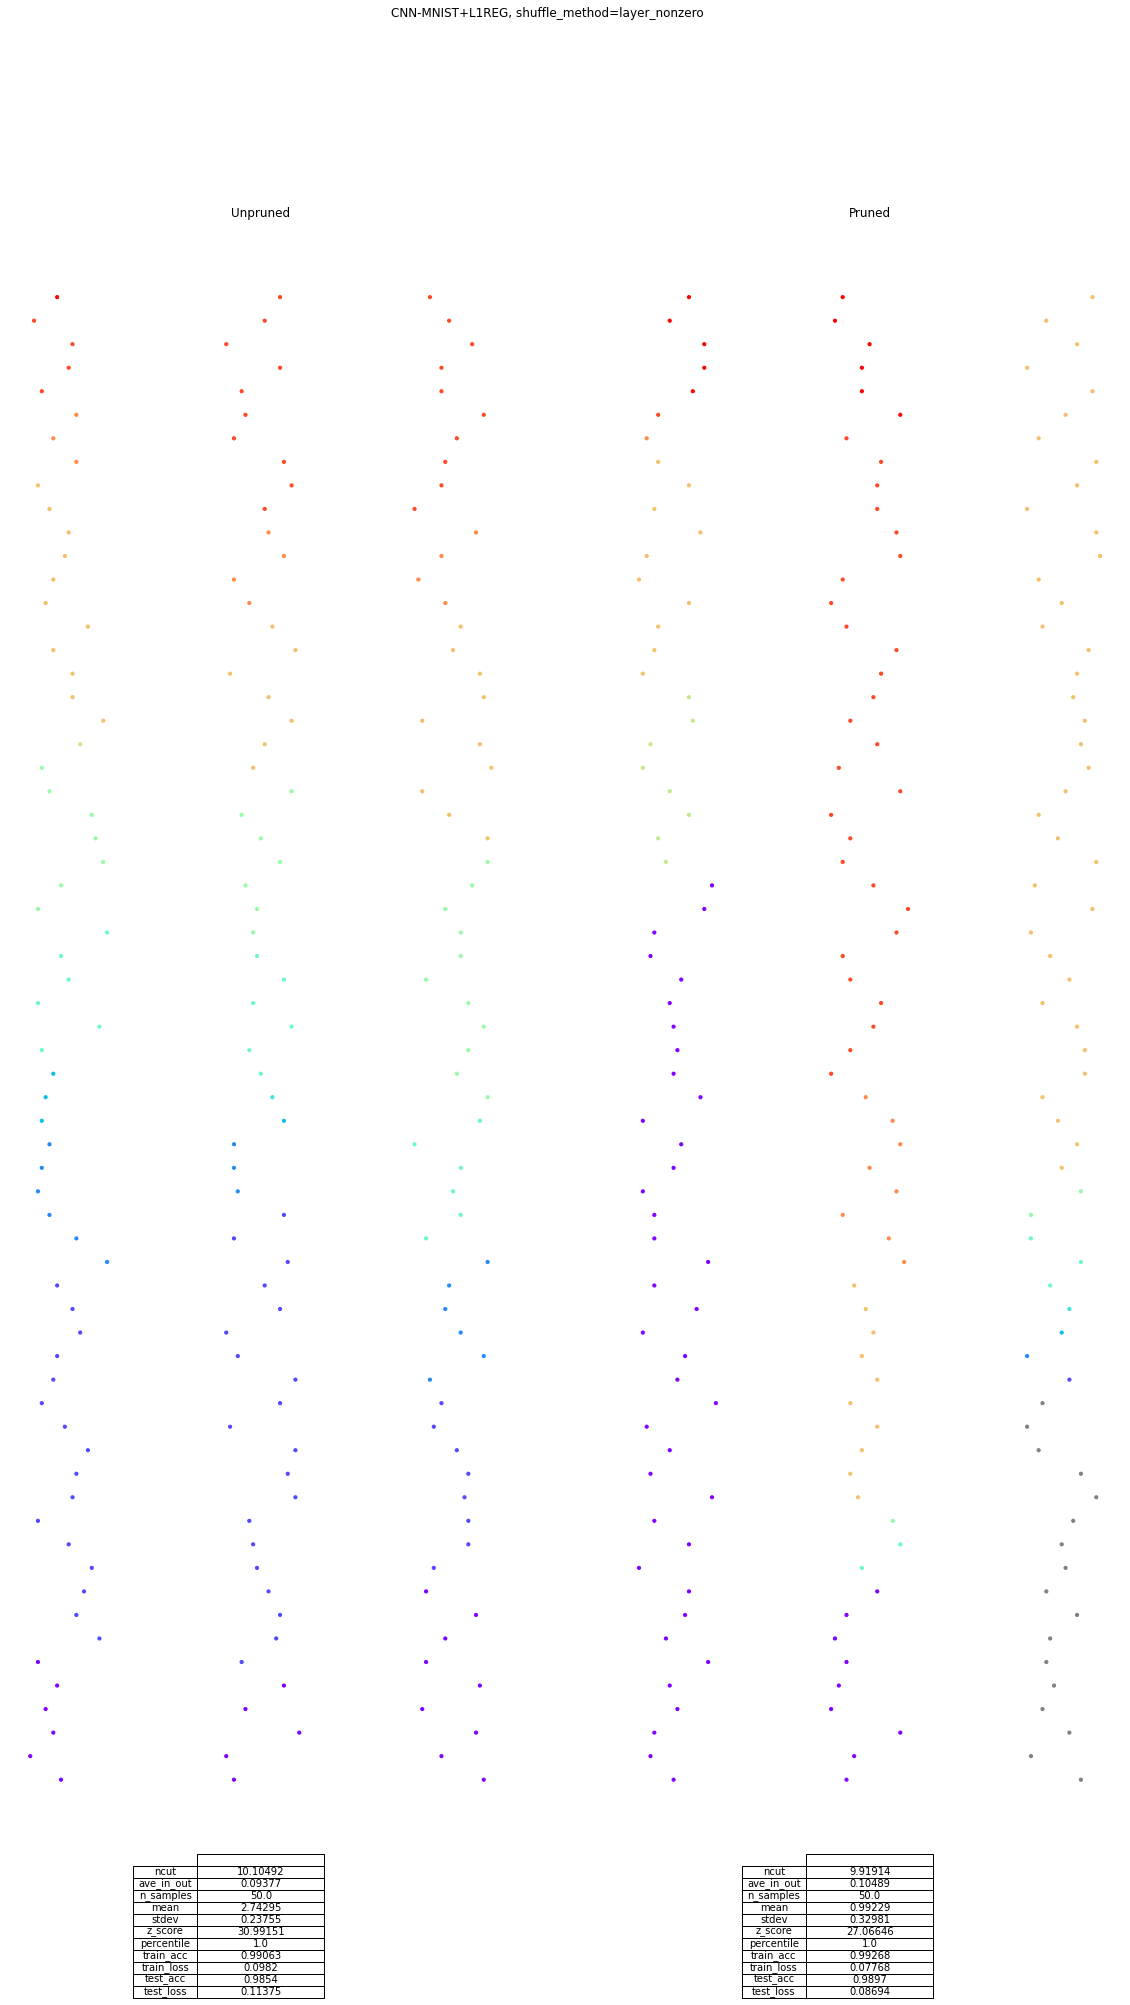

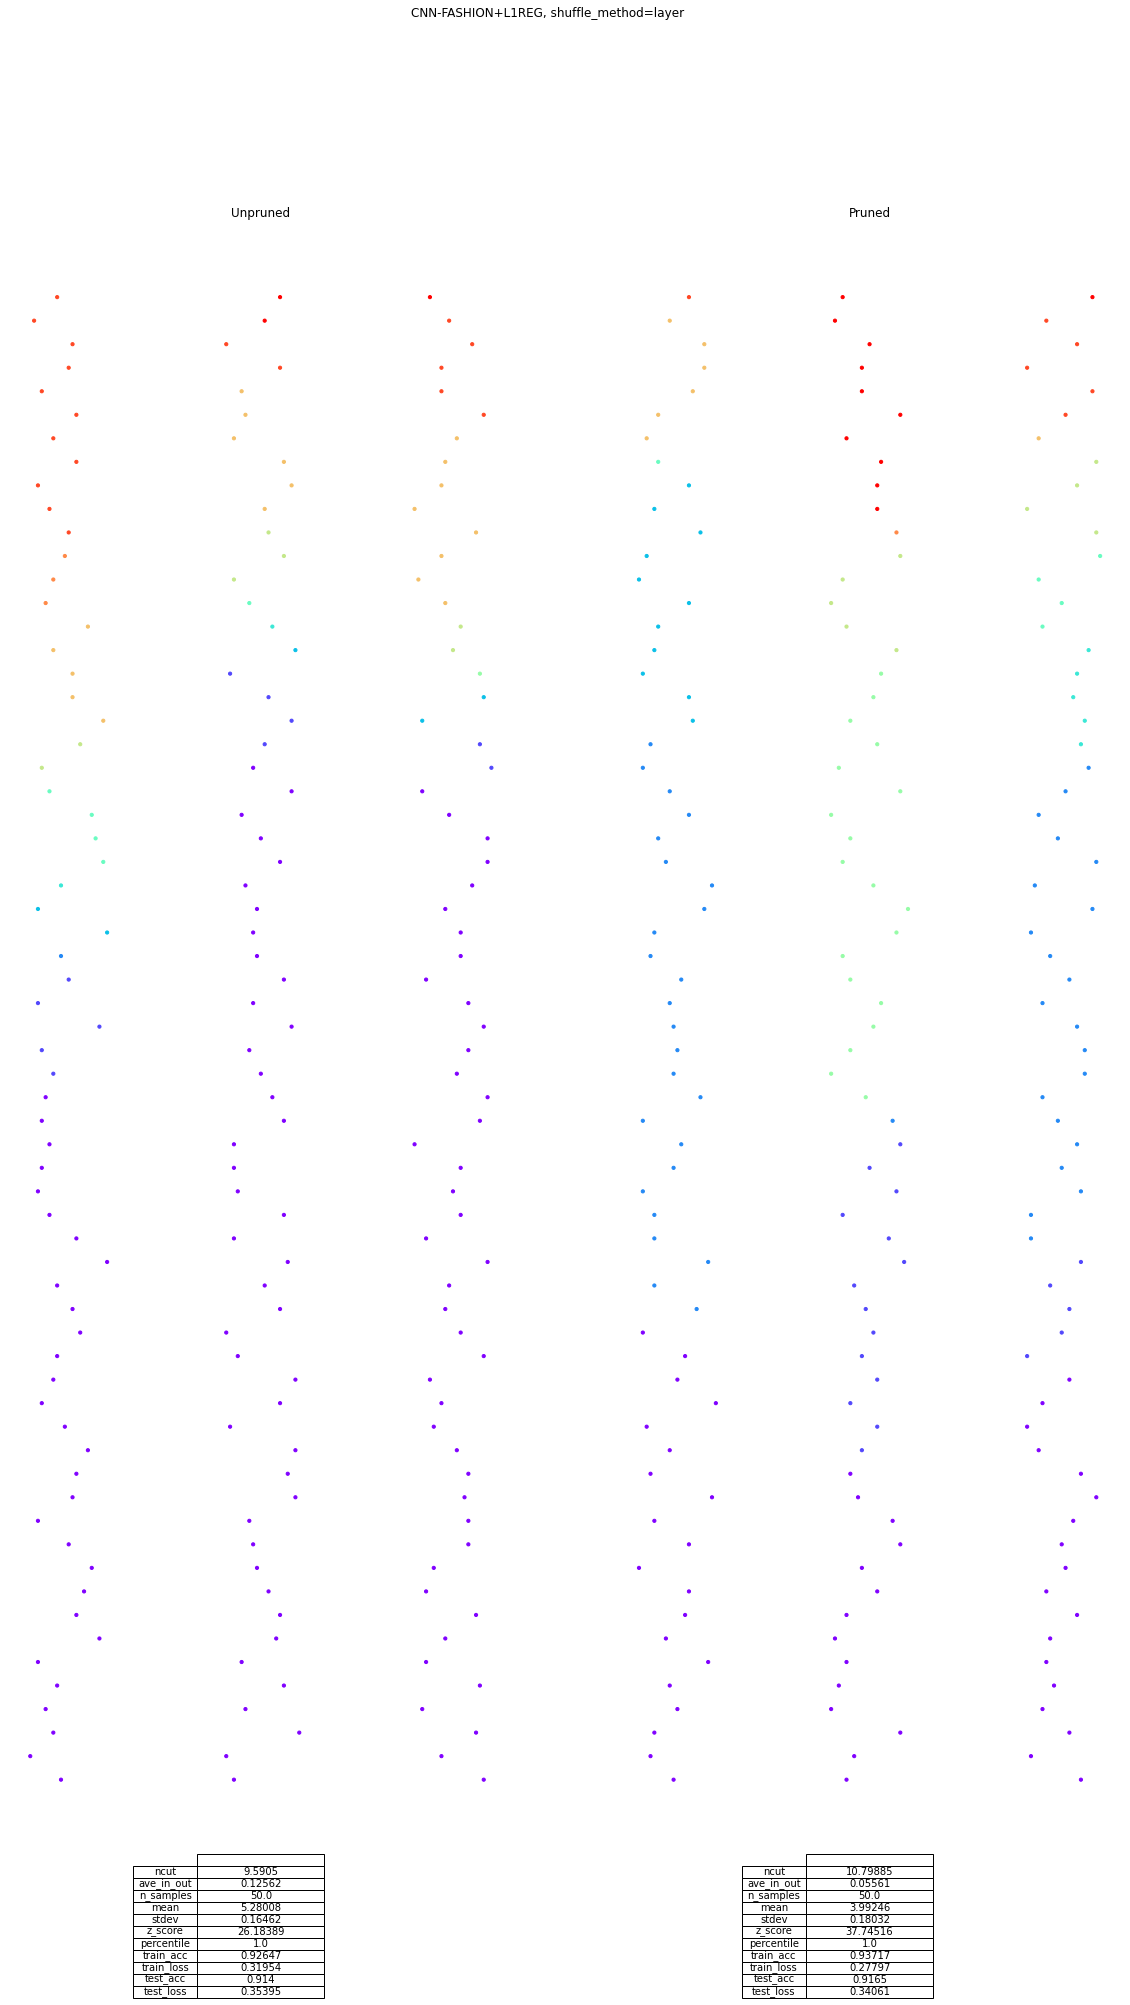

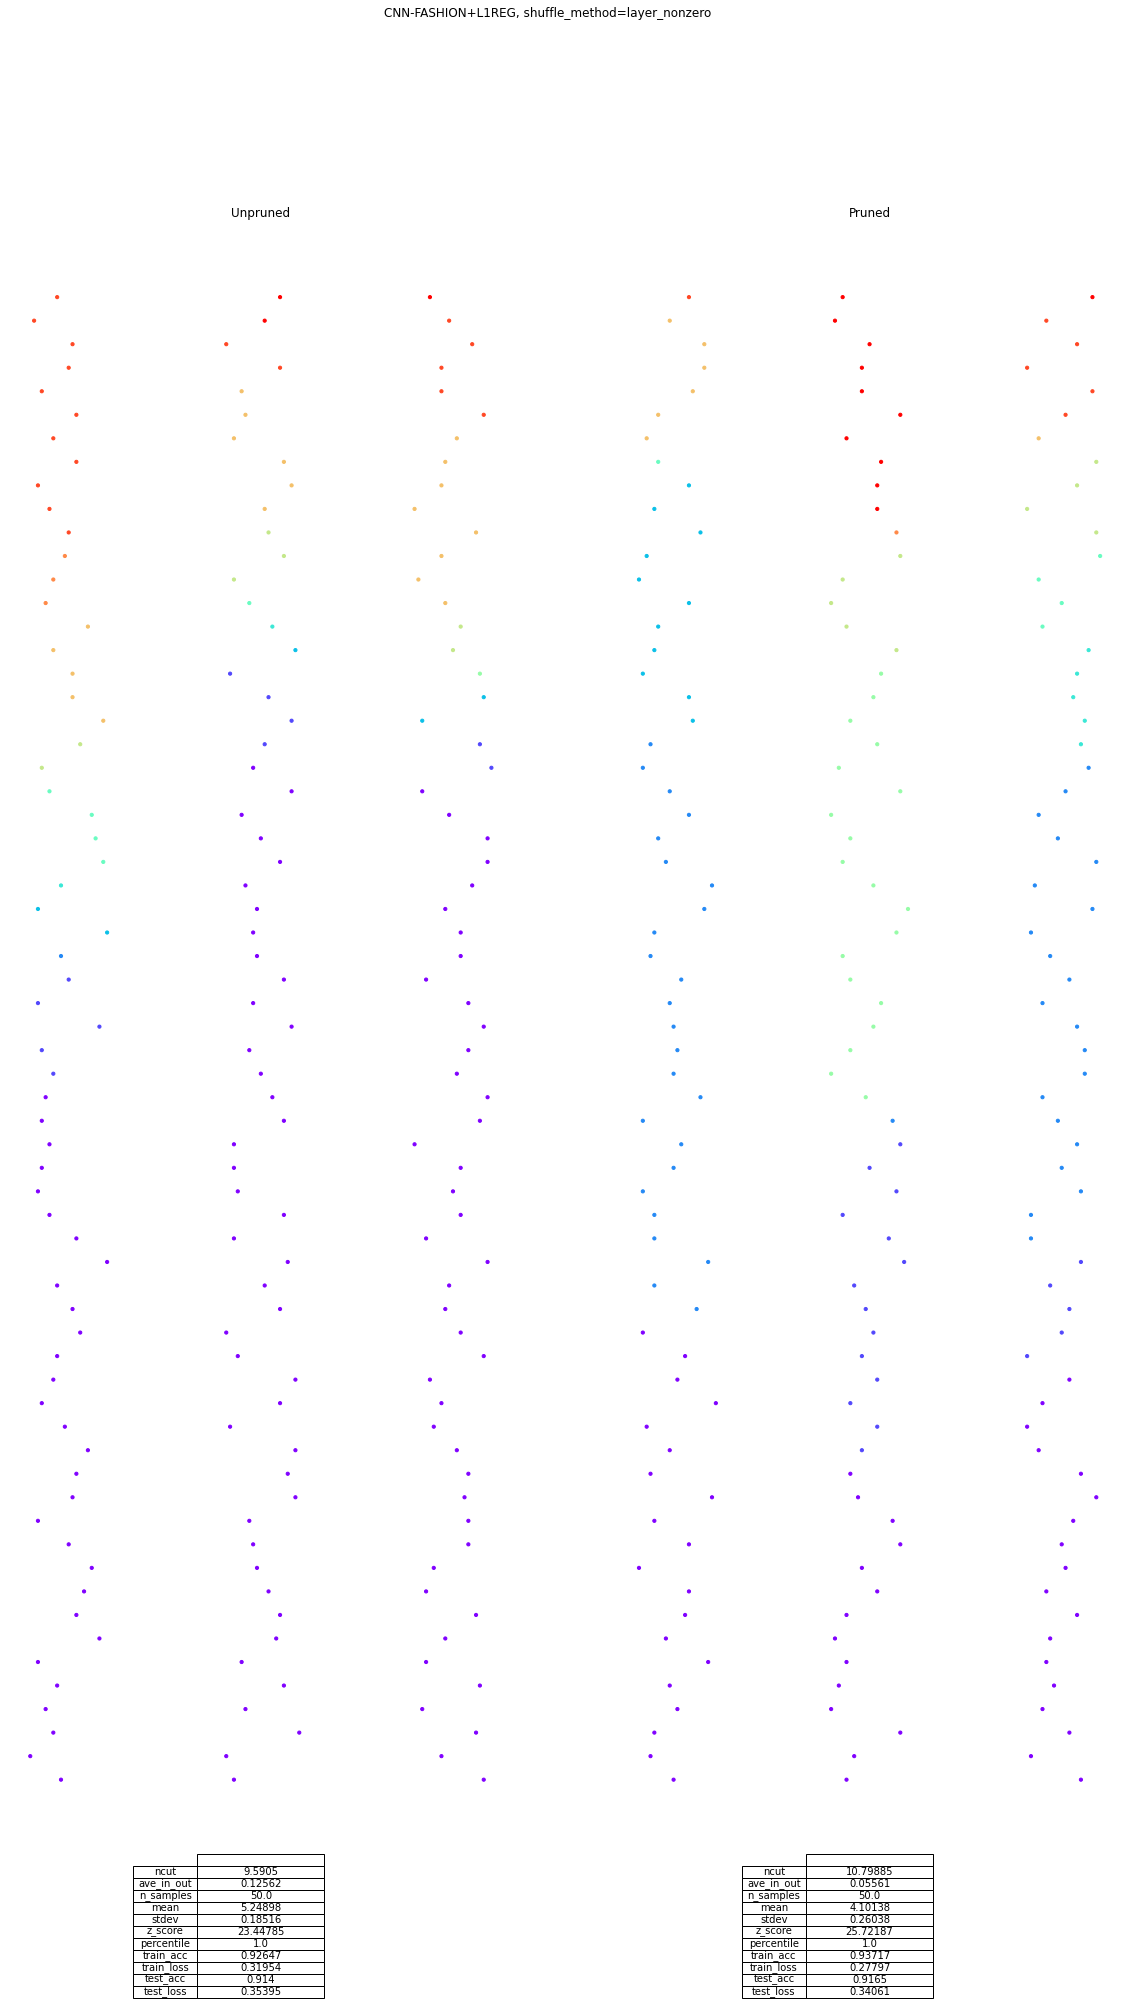

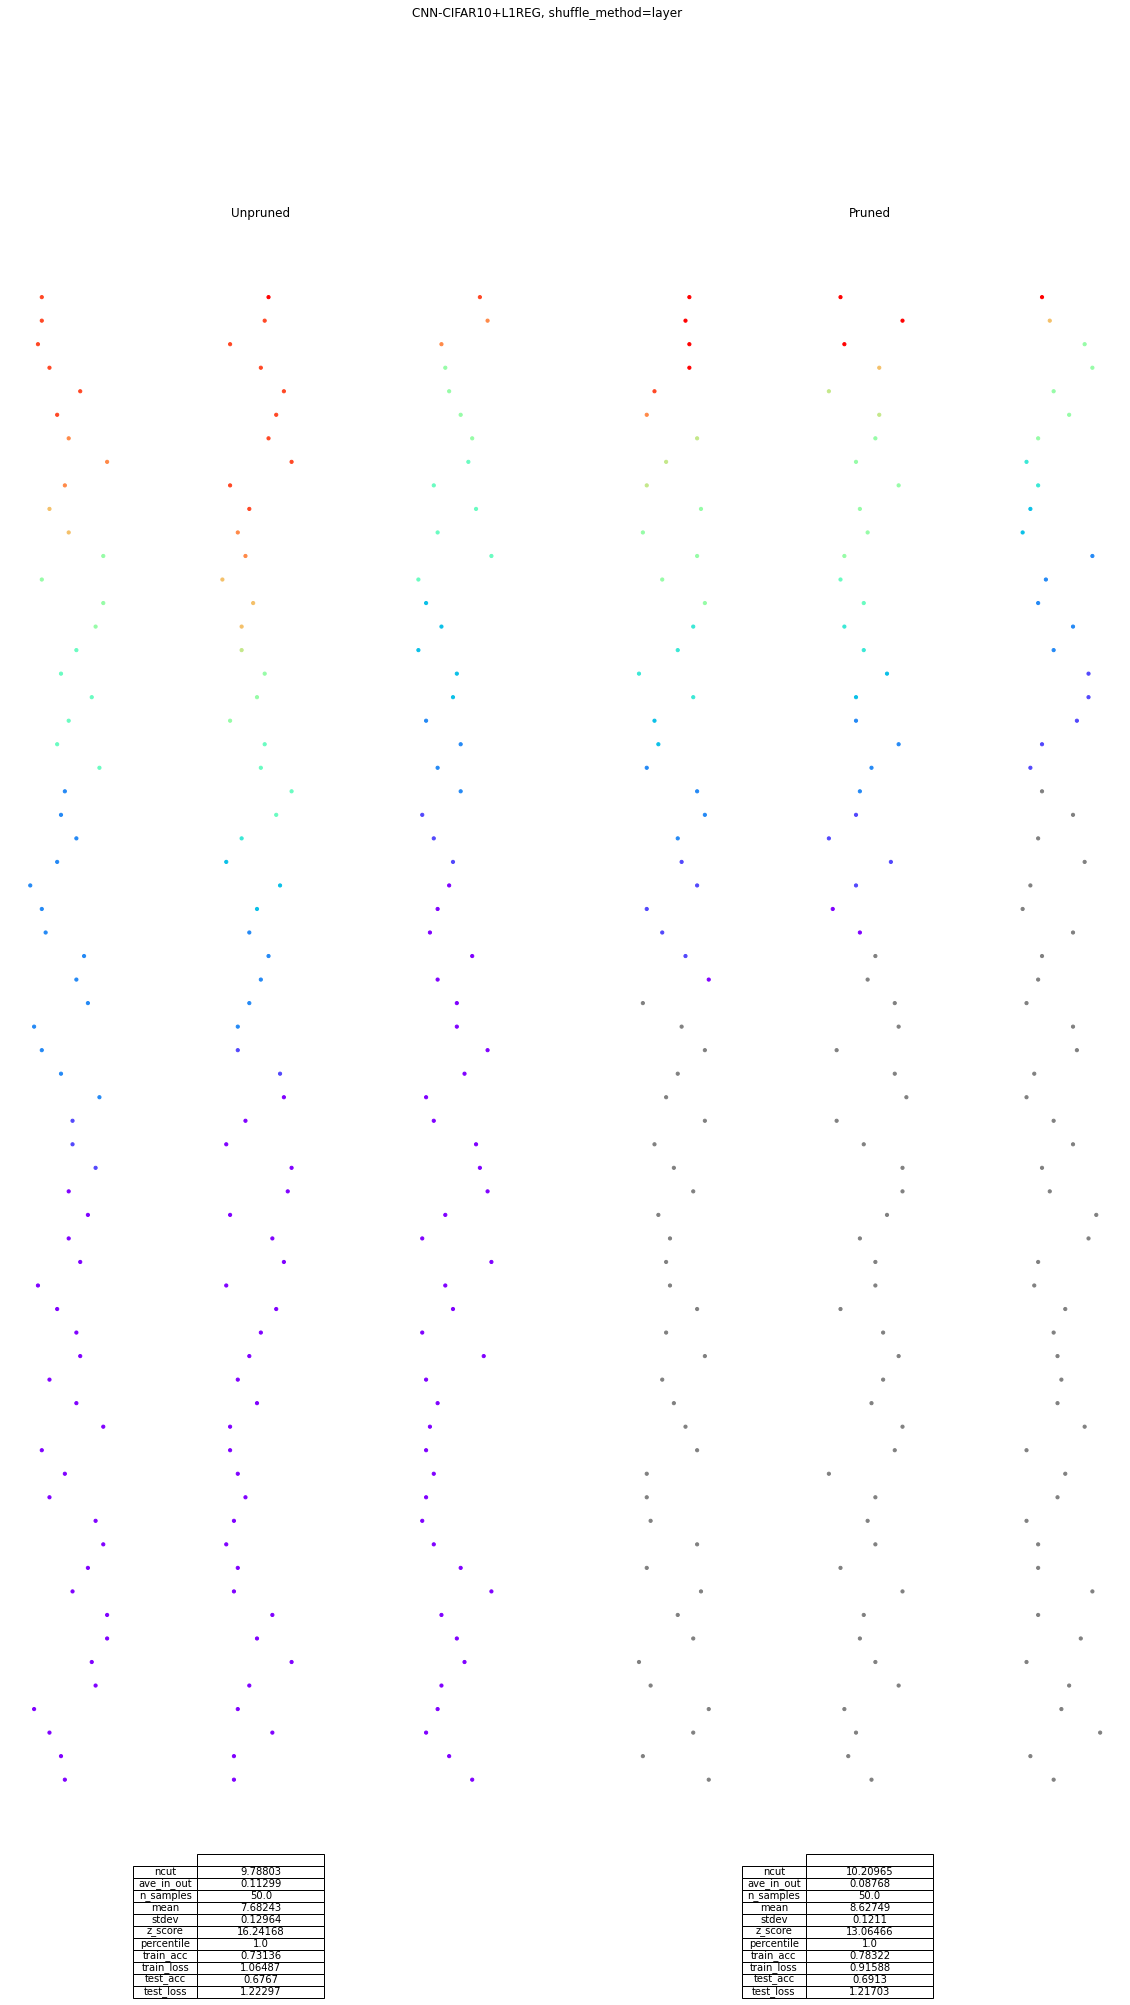

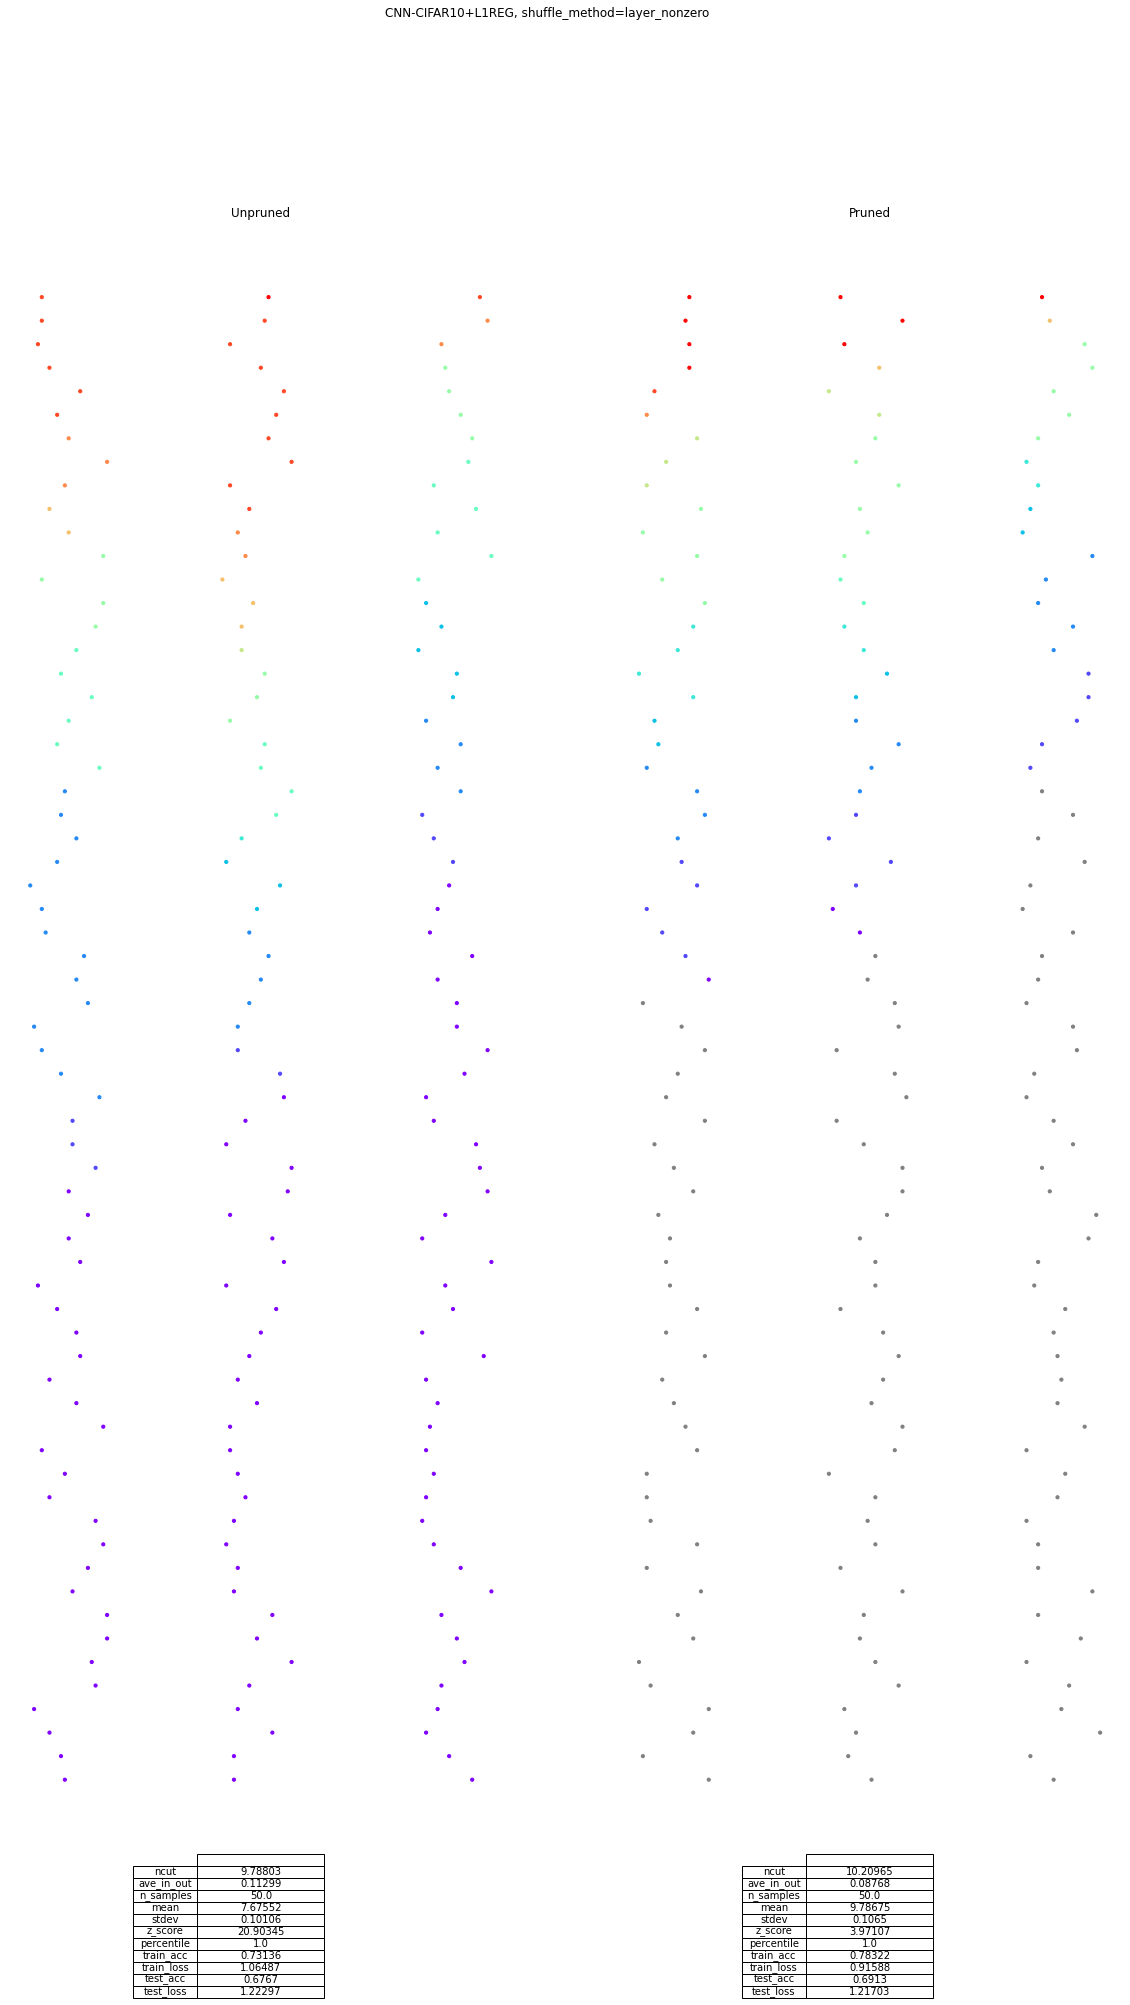

In [3]:
for model_name, path in tqdm(model_paths.items()):

    for sm in shuffle_methods:

        results = run_double_spectral_cluster(path, n_clusters=n_clust, n_samples=n_samples,
                                              n_workers=n_workers, shuffle_method=sm)

        draw_mlp_clustering_report(path, results, n_cluster=n_clust,
                                   title=f'{model_name}, shuffle_method={sm}')